In [1]:
import pandas as pd

ds=pd.read_csv('datasets/Salary_Data.csv')
ds

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [2]:
#got only 1 attribute
import numpy as np

x=ds['YearsExperience']
y=ds['Salary']

x=x[:,np.newaxis] #attribute dimension
x.shape

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


(30, 1)

In [8]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

#find best model
model=SVR()
param={
    'kernel':['rbf'],
    'C':[500,5000,50000],
    'gamma':[0.5,0.05,0.005]
}
grid=GridSearchCV(model,param)
grid.fit(x,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [500, 5000, 50000], 'gamma': [0.5, 0.05, 0.005],
                         'kernel': ['rbf']})

In [9]:
grid.best_params_

{'C': 50000, 'gamma': 0.005, 'kernel': 'rbf'}

In [10]:
model=SVR(C=50000, gamma=0.005, kernel='rbf') #C=regularized param

model.fit(x,y)

SVR(C=50000, gamma=0.005)

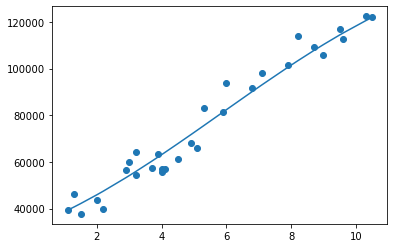

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,model.predict(x))